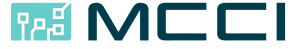

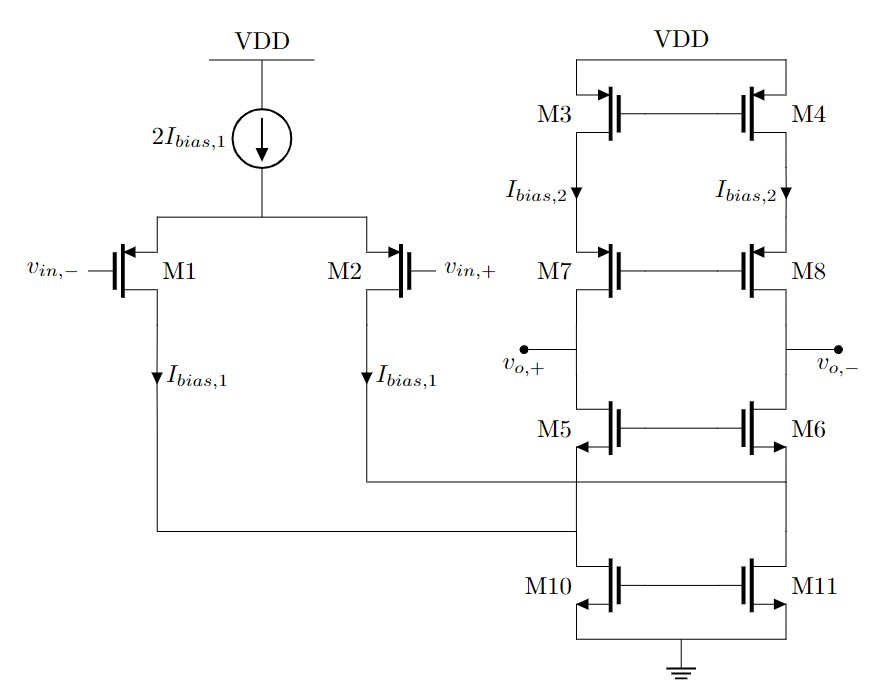

In [4]:
# for an initial run

#         1    2   3   4   5   6   7   8   9  10  11
GM_IDs = [20, 20, 16, 16, 20, 20, 20, 20, 15, 16, 16]

In [37]:
x = [2,2,2,2]
y = np.linspace(2, 6, 3)
 
Output = np.outer(x, y)
print("X: ", x)
print("Y : ", y)
print("Result : ",Output)

X:  [2, 2, 2, 2]
Y :  [2. 4. 6.]
Result :  [[ 4.  8. 12.]
 [ 4.  8. 12.]
 [ 4.  8. 12.]
 [ 4.  8. 12.]]


In [38]:
#         1    2   3   4   5   6   7   8   9  10  11
GM_IDs = [2.5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

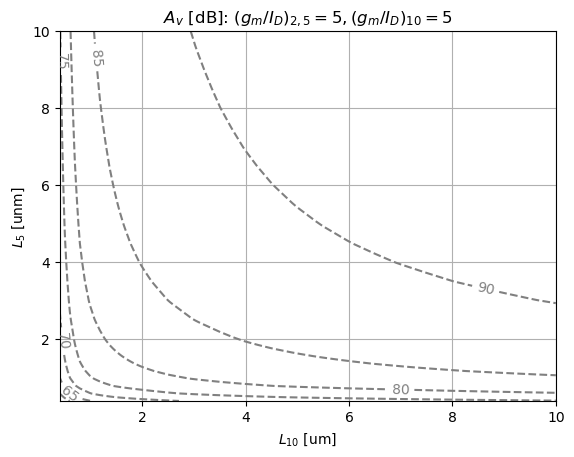

In [121]:
# size the NMOS cascode to achieve the required DC gain
# we have fixed gm/ID of all devices, so sweep device lengths

# lengths of current source and cascode are our design variables
L10s = np.linspace(0.4, 10, num=100)
L5s  = np.linspace(0.4, 10, num=100)
VDD = 3.3

# plot the gain and validate assumption about lengths
ID_GDS10 = 1/(NCH.look_up('GDS_ID', GM_ID=GM_IDs[9], L=L10s, VDS=VDD/4))
GM_GDS5  = (NCH.look_up('GM_GDS', GM_ID=GM_IDs[4], L=L5s, VDS=VDD/4))

Avs = 20*np.log10(1/1.25 * 1/2 * GM_IDs[0] * np.outer( ID_GDS10, GM_GDS5 ) )

contour = plt.contour(L10s, L5s, Avs, levels=8, colors='gray', linestyles='dashed')
plt.clabel(contour, inline=1, fontsize=10, colors='gray')
plt.title(r'$A_v$ [dB]: $(g_m/I_D)_{2,5}=5,(g_m/I_D)_{10}=5$')
plt.xlabel(r"$L_{10}$ [um]")
plt.ylabel(r"$L_{5}$ [unm]")
#plt.axhline(1, color='black', linestyle='-')
#plt.axvline(2, color='black', linestyle='-')

plt.savefig('av_vs_l.pdf')
plt.grid()
plt.show()

**Non-dominant Pole**

$$
\omega_2 = 2\pi f_{nd} \approx \frac{g_{m,5}}{\left( C_{gs,5} + C_{dd,10} + C_{dd,1} \right)}
$$

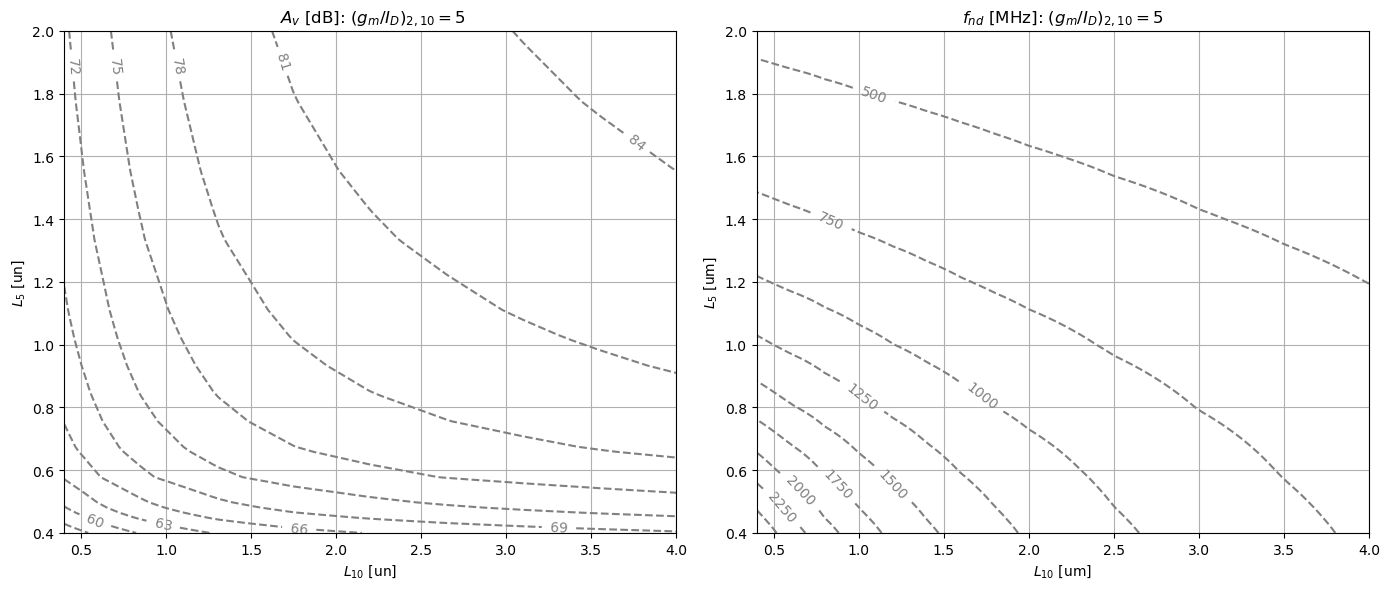

In [133]:
# from spec
fu = 10e6
CL = 10e-12
VDD = 3.3
GM_ID1 = GM_IDs[0]
Ibias1 = fu * 2 * np.pi * CL / (GM_IDs[0])
GM_IDNCS = 5
GM_IDNC =  5

# size input device to compute CDD1 L = 0.5
L1 = 0.7
W1 = Ibias1 * 1/PCH.look_up('ID_W', GM_ID = GM_ID1, L=L1, VDS=VDD/2)
CDD1 = W1 * PCH.look_up('CDD_W', GM_ID=GM_ID1, L=L1, VDS=VDD/4)
# compute gm of cascode
gm5 = GM_IDNC * Ibias1

def get_fnd(L10s, L5s, Ibias):
    # size CS and cascode
    WNCSs = 2 * Ibias * 1/NCH.look_up('ID_W', GM_ID=GM_IDNCS, L=L10s, VDS=VDD/4)
    WNCs = Ibias * 1/NCH.look_up('ID_W', GM_ID=GM_IDNC, L=L5s, VDS=VDD/4)
    
    CDD10s = WNCSs * NCH.look_up('CDD_W', GM_ID=GM_IDNCS, L=L10s, VDS=VDD/4)
    CGS5s = WNCs * NCH.look_up('CGS_W', GM_ID=GM_IDNC, L=L5s, VDS=VDD/4)
    # return fnd in MHz
    return (1e-6) * gm5 / (2 * np.pi * (CDD1 + CDD10s[:, np.newaxis] + CGS5s.T)).T

# lengths of current source and cascode are our design variables
L10s = np.linspace(0.4, 4, num=100)
L5s  = np.linspace(0.4, 2, num=100)
VDD = 3.3

# plot the gain
ID_GDS10 = 1/(NCH.look_up('GDS_ID', GM_ID=GM_IDs[9], L=L10s, VDS=VDD/4))
GM_GDS5  = (NCH.look_up('GM_GDS', GM_ID=GM_IDs[4], L=L5s, VDS=VDD/4))

Avs = 20*np.log10(1/1.25 * 1/2 * GM_IDs[0] * np.outer( ID_GDS10, GM_GDS5 ) )

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
contour = axes[0].contour(L10s, L5s, Avs, levels=10, colors='gray', linestyles='dashed')
axes[0].clabel(contour, inline=1, fontsize=10, colors='gray')
axes[0].set_title(r' $A_v$ [dB]: $(g_m/I_D)_{2,10}=5$')

axes[0].set_xlabel(r'$L_{10}$ [un]')
axes[0].set_ylabel(r'$L_{5}$ [un]')
axes[0].grid()

# plot behaviour of the non-dominant pole
contour = axes[1].contour(L10s, L5s, get_fnd(L10s, L5s, Ibias1), levels=10, colors='gray', linestyles='dashed')
axes[1].clabel(contour, inline=1, fontsize=10, colors='gray')
axes[1].set_title(r'$f_{nd}$ [MHz]: $(g_m/I_D)_{2,10}=5$')
axes[1].set_xlabel(r'$L_{10}$ [um]')
axes[1].set_ylabel(r'$L_{5}$ [um]')
axes[1].grid()


plt.savefig('length_av_fnd.pdf')
fig.tight_layout()
plt.show()